# 5일차 과제) 타이타닉 데이터 회기분석


In [59]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

matplotlib.rcParams['font.family'] = 'NanumGothicCoding'
# matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [21]:
# !. dec 컬럼을 삭제하고 나이(age)의 nan 데이터를 삭제
df = titanic.drop("deck", axis=1)
df = df[~df["age"].isna()]
df

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

In [32]:
# 2. 생존자와 사망자에 대한 갯수를 구하시오
# g = df.groupby("survived")
# g.count()
print("생존자:", len(df[df["survived"]==1]))
print("사망자:", len(df[df["survived"]==0]))

생존자: 290
사망자: 424


In [48]:
# 3. 등급별(pclass) 평균 생존율을 구하시오
g = df.groupby("pclass")["survived"]
pd.DataFrame({"생존율(%)": g.sum() / g.count()}).style.format("{:.2%}")

In [51]:
# 4. SibSp(가족과 탑승)의 평균 생존율을 구하시오
g = df.groupby("sibsp")["survived"]
pd.DataFrame({"생존율(%)": g.sum() / g.count()}).loc[1:].style.format("{:.2%}")

In [53]:
# 5. 혼자탑승(alone)한 인원의 평균 생존율을 구하시오
g = df.groupby("sibsp")["survived"]
pd.DataFrame({"생존율(%)": g.sum() / g.count()}).loc[[0]].style.format("{:.2%}")

In [54]:
# 6. 성별 평균 생존율을 구하시오.
g = df.groupby("sex")["survived"]
pd.DataFrame({"생존율(%)": g.sum() / g.count()}).style.format("{:.2%}")

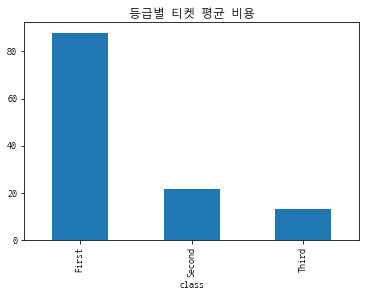

In [63]:
# 7. 등급별 티켓비용(fare)의 평균차트
g = df.groupby("class")["fare"]
g.mean().plot(kind="bar",title="등급별 티켓 평균 비용")
plt.show()

In [66]:
# 8. 나이분류 컬럼을 추가하시오.
def age_range(age):
    if age <= 15:
        return "미성년자"
    if age <= 25:
        return "청년"
    if age <= 35:
        return "중년"
    if age <= 60:
        return "장년"
    return "노년"

df["분류"] = df["age"].apply(age_range)
df[["age", "분류"]]

age    분류
0    22.0    청년
1    38.0    장년
2    26.0    중년
3    35.0    중년
4    35.0    중년
6    54.0    장년
7     2.0  미성년자
8    27.0    중년
9    14.0  미성년자
10    4.0  미성년자
11   58.0    장년
12   20.0    청년
13   39.0    장년
14   14.0  미성년자
15   55.0    장년
16    2.0  미성년자
18   31.0    중년
20   35.0    중년
21   34.0    중년
22   15.0  미성년자
23   28.0    중년
24    8.0  미성년자
25   38.0    장년
27   19.0    청년
30   40.0    장년
33   66.0    노년
34   28.0    중년
35   42.0    장년
37   21.0    청년
38   18.0    청년
..    ...   ...
856  45.0    장년
857  51.0    장년
858  24.0    청년
860  41.0    장년
861  21.0    청년
862  48.0    장년
864  24.0    청년
865  42.0    장년
866  27.0    중년
867  31.0    중년
869   4.0  미성년자
870  26.0    중년
871  47.0    장년
872  33.0    중년
873  47.0    장년
874  28.0    중년
875  15.0  미성년자
876  20.0    청년
877  19.0    청년
879  56.0    장년
880  25.0    청년
881  33.0    중년
882  22.0    청년
883  28.0    중년
884  25.0    청년
885  39.0    장년
886  27.0    중년
887  19.0    청년
889  26.0    중년
890  32.0    중년

[714 rows x 2 columns]

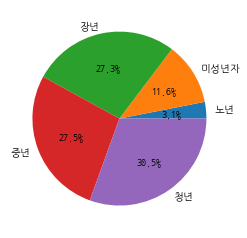

In [76]:
# 9. 나이분류를 파이차트로 표시하시오
# plt.pie()
g = df.groupby("분류")["age"]
dt = g.count()
plt.pie(dt, labels=dt.index, autopct="%.1f%%")
plt.show()

In [90]:
# 10. 생존율이 가장 높은 나이분류를 구하시오
g = df.groupby("분류")["survived"]
pd.DataFrame({"생존율(%)": g.sum() / g.count()}) \
    .sort_values('생존율(%)', ascending=False) \
    .head(1) \
    .style.format("{:.2%}")

In [153]:
# 11. 성별, 나이분류별, 등급(pclass)를 멀티인덱스로 생존율을 값으로 표시하시오
g = df[["sex", "age", "pclass", "survived"]].groupby(["sex", "age", "pclass"])
ret = g.agg(lambda v: round(v.sum() / v.count() * 100, 2))
ret.columns = ["생존율(%)"]
ret

생존율(%)
sex    age   pclass        
female 0.75  3       100.00
       1.00  3       100.00
       2.00  1         0.00
             2       100.00
             3        25.00
       3.00  2       100.00
             3         0.00
       4.00  2       100.00
             3       100.00
       5.00  2       100.00
             3       100.00
       6.00  2       100.00
             3         0.00
       7.00  2       100.00
       8.00  2       100.00
             3         0.00
       9.00  3         0.00
       10.00 3         0.00
       11.00 3         0.00
       13.00 2       100.00
             3       100.00
       14.00 1       100.00
             2       100.00
             3        50.00
       14.50 3         0.00
       15.00 1       100.00
             3       100.00
       16.00 1       100.00
             3        66.67
       17.00 1       100.00
...                     ...
male   51.00 1        50.00
             2         0.00
             3         0.00
       52.00 1        50.00
             2         0.00
       54.00 1         0.00
             2         0.00
       55.00 1         0.00
       55.50 3         0.00
       56.00 1        33.33
       57.00 2         0.00
       58.00 1         0.00
       59.00 2         0.00
             3         0.00
       60.00 1        50.00
             2         0.00
       61.00 1         0.00
             3         0.00
       62.00 1         0.00
             2       100.00
       64.00 1         0.00
       65.00 1         0.00
             3         0.00
       66.00 2         0.00
       70.00 1         0.00
             2         0.00
       70.50 3         0.00
       71.00 1         0.00
       74.00 3         0.00
       80.00 1       100.00

[283 rows x 1 columns]